# Import lib

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
# The latest CDF library https://spdf.gsfc.nasa.gov/pub/software/cdf/dist/latest/
from spacepy import pycdf

# os.environ["CDF_LIB"] = "C:\\Program Files\\CDF_Distribution\\cdf39_0-dist\\lib"
import os
os.environ["CDF_LIB"] = "/Applications/cdf/cdf39_0-dist/lib"

# *** Library ***
sys.path.append('./lib/')
# import juice_cdf_lib as juice_cdf
import juice_math_lib as juice_math
import juice_sid3_lib as juice_sid3

# *** Folder set ***
work_dir = '/Users/user/0-python/JUICE_GS_test/ql/sid3/'    # Plot dump folder
data_dir = '/Users/user/0-python/JUICE_GS_test/cdf/'        # Data folder

# Setting and Read CDF file

In [3]:
# *** Mode set ***
hz_mode = 0                             # 0: sum    1: /Hz
cal_mode = 0                            # 0: raw    1: dBm＠ADC  2: V@HF   3:V2@HF   4:V2@RWI

# *** Parameter set ***
cal = 0                                 # 0: background   1: cal
f_max = 45000                           # f_max [kHz]
f_min = 80                              # f_min [kHz]
p_max = 8.5                             # background: 8   CAL: 10
p_min = 1.5                             # background: 2   CAL: 5

In [4]:
# *** Conversion factor: cal_mode ***
cf = 0.0                                # Conversion Factor: RAW
if cal_mode == 1:
    cf = -104.1                         # dBm @ ADC 
elif cal_mode == 2:
    cf = -104.1 - 10.00 - 15.0          # V(amplitude) @ HF -- in EM2-1: HF-gain +15dB, ADC: 2Vpp  ==> EM2-3 & later: same [-6dB + 6dB]
elif cal_mode == 3:
    cf = -104.1 - 13.01 - 15.0          # V^2 @ HF (EM2-0 case)
elif cal_mode == 4:
    cf = -104.1 - 13.01 - 15.0 - 5.0    # V^2 @ RWIin -- temporary

# ******************************************************
# [EM2-0]
# "1-bit" = -104.1 dBm = -114.1 dB V  = 1.97E-6 V    ==> "20-bit": 2.06 Vpp
# "HF input"  +15dB(AMP) -3dB(50-ohm) = "+12dB"      ==> "1-bit": 5E-7 V,  Full: 0.5 Vpp
# ******************************************************
# [EM2-3]
# "1-bit" = -110.1 dBm = -110.1 dB V  = 0.99E-7 V "  ==> "20-bit": 1.03 Vpp
# "HF input"  +9dB(AMP)  -3dB(50-ohm受け) = "+6dB"    ==> "1-bit": 5E-7 V,  Full: 0.5 Vpp
# ******************************************************

# *** Max / Min in plots ***
p_max = p_max + cf/10
p_min = p_min + cf/10
if hz_mode == 1:
    p_max = p_max - 5.0
    p_min = p_min - 5.0

In [5]:
# *** Flight - Ver. 1 ***

# *** 2023/4/20 before deployment of MAG-BOOM
# data_name = '202304/JUICE_L1a_RPWI-HF-SID3_20230420T103558-20230420T103800_V01___RPR1_52000002_2023.110.10.48.51.475.cdf'

# *** 2023/5/23 before deployment of RWI
# data_name = '202305/JUICE_L1a_RPWI-HF-SID3_20230523T090033-20230523T091021_V01___RPR1_52000000_2023.143.09.24.44.467.cdf'
# data_name = '202305/JUICE_L1a_RPWI-HF-SID3_20230523T092629-20230523T093617_V01___RPR1_52000000_2023.143.09.50.39.471.cdf'
# data_name = '202305/JUICE_L1a_RPWI-HF-SID3_20230523T095226-20230523T100214_V01___RPR1_52000000_2023.143.10.05.03.469.cdf'
# data_name = '202305/JUICE_L1a_RPWI-HF-SID3_20230523T102036-20230523T102247_V01___RPR1_52000000_2023.143.10.24.52.503.cdf'
# *** 2023/5/23 after X deployment of RWI
# data_name = '202305/JUICE_L1a_RPWI-HF-SID3_20230523T102431-20230523T102647_V01___RPR1_52000001_2023.143.10.29.16.491.cdf'
# data_name = '202305/JUICE_L1a_RPWI-HF-SID3_20230523T104536-20230523T104747_V01___RPR1_52000001_2023.143.10.49.52.471.cdf'

# *** 2023/5/23 after Z deployment of RWI
# data_name = '202305/JUICE_L1a_RPWI-HF-SID3_20230523T104931-20230523T105148_V01___RPR1_52000002_2023.143.10.54.17.487.cdf'
# data_name = '202305/JUICE_L1a_RPWI-HF-SID3_20230523T110537-20230523T110749_V01___RPR1_52000002_2023.143.11.09.54.471.cdf'

# *** 2023/5/23 after Y deployment of RWI
# data_name = '202305/JUICE_L1a_RPWI-HF-SID3_20230523T110933-20230523T111149_V01___RPR1_52000003_2023.143.11.14.17.500.cdf'
# *** 2023/5/23 background
# data_name = '202305/JUICE_L1a_RPWI-HF-SID3_20230523T121538-20230523T122526_V01___RPR1_52000003_2023.143.12.39.49.467.cdf'
# data_name = '202305/JUICE_L1a_RPWI-HF-SID3_20230523T124134-20230523T125122_V01___RPR1_52000003_2023.143.12.55.52.507.cdf'
# data_name = '202305/JUICE_L1a_RPWI-HF-SID3_20230523T125738-20230523T130726_V01___RPR1_52000003_2023.143.13.11.36.466.cdf'

# *** 20230525 
# data_name = '202305/JUICE_L1a_RPWI-HF-SID3_20230525T130149-20230525T131137_V01___RPR1_52000006_2023.145.13.51.50.508.cdf'
# data_name = '202305/JUICE_L1a_RPWI-HF-SID3_20230525T150435-20230525T151423_V01___RPR1_52000006_2023.145.15.46.34.503.cdf'
# data_name = '202305/JUICE_L1a_RPWI-HF-SID3_20230525T165313-20230525T170301_V01___RPR1_52000006_2023.145.17.20.46.547.cdf'

In [6]:
# *** Prelaunch - Ver.1 ***
# *** 20210531 
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20210531_20510517T133347-20510517T133447_V01___20210531_SCPFM_PTR_RPWI_2_day5_xid32814.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20210531_20510515T092459-20510515T092559_V01___20210531_SCPFM_PTR_RPWI_2_day4_xid32813.data.hf.ccsds.cdf'

# *** 20210600
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20210600_20510622T074959-20510622T080959_V01___SCTBTV_Phase3_xid32776.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20210600_20510622T161736-20510624T145456_V01___SCTBTV_Phase5_xid32794.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20210600_20510630T214626-20510630T214726_V01___SCTBTV_Phase11_xid32836.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20210600_20510709T121733-20510709T121833_V01___SCTBTV_Phase13_xid32848.data.hf.ccsds.cdf'

# *** 20211100
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20211100_20511126T021431-20511126T021731_V01___SCPFM_PTR_RPWI_delta.RPWI_SCM_TEST_xid32816.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20211100_20511126T021831-20511126T022131_V01___SCPFM_PTR_RPWI_delta.RPWI_SCM_TEST_xid32817.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20211100_20511126T022231-20511126T022431_V01___SCPFM_PTR_RPWI_delta.RPWI_SCM_TEST_xid32818.data.hf.ccsds.cdf'

# *** 20220400
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520404T163239-20520404T163339_V01___SCPFM_EMCR.CFDP_04_RT_EMC_AC_SC2RIME_xid32994.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520404T163239-20520404T163339_V01___SCPFM_EMCR.Phase4_xid32994.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520404T175239-20520404T175339_V01___SCPFM_EMCR.CFDP_04_RT_EMC_AC_SC2RIME_xid32995.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520404T175239-20520404T175339_V01___SCPFM_EMCR.Phase4_xid32995.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520404T182339-20520404T182439_V01___SCPFM_EMCR.CFDP_04_RT_EMC_AC_SC2RIME_xid32996.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520404T182339-20520404T182439_V01___SCPFM_EMCR.Phase4_xid32996.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520404T184439-20520404T184539_V01___SCPFM_EMCR.CFDP_04_RT_EMC_AC_SC2RIME_xid32997.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520404T184439-20520404T184539_V01___SCPFM_EMCR.Phase4_xid32997.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520404T191939-20520404T192039_V01___SCPFM_EMCR.CFDP_04_RT_EMC_AC_SC2RIME_xid32998.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520404T191939-20520404T192039_V01___SCPFM_EMCR.Phase4_xid32998.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520405T063149-20520405T063249_V01___SCPFM_EMCR.CFDP_04_RT_EMC_AC_SC2RIME_xid32999.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520405T063149-20520405T063249_V01___SCPFM_EMCR.Phase4_xid32999.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520405T091140-20520405T091240_V01___SCPFM_EMCR.CFDP_04_RT_EMC_AC_SC2RIME_xid33000.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520405T091140-20520405T091240_V01___SCPFM_EMCR.Phase4_xid33000.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520405T104140-20520405T104240_V01___SCPFM_EMCR.CFDP_04_RT_EMC_AC_SC2RIME_xid33001.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520405T104140-20520405T104240_V01___SCPFM_EMCR.Phase4_xid33001.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520405T113940-20520405T114040_V01___SCPFM_EMCR.CFDP_04_RT_EMC_AC_SC2RIME_xid33002.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520405T113940-20520405T114040_V01___SCPFM_EMCR.Phase4_xid33002.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520405T121740-20520405T121840_V01___SCPFM_EMCR.CFDP_04_RT_EMC_AC_SC2RIME_xid33003.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520405T121740-20520405T121840_V01___SCPFM_EMCR.Phase4_xid33003.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520408T060034-20520408T060134_V01___SCPFM_EMCR.RPWI_NCR_xid32798.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520408T063535-20520408T063635_V01___SCPFM_EMCR.RPWI_NCR_xid32799.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520408T080529-20520408T080629_V01___SCPFM_EMCR.RPWI_NCR_xid32800.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520408T105119-20520408T105219_V01___SCPFM_EMCR.RPWI_NCR_xid32801.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520408T122719-20520408T122819_V01___SCPFM_EMCR.RPWI_NCR_xid32802.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520408T131319-20520408T131419_V01___SCPFM_EMCR.RPWI_NCR_xid32803.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20220400_20520408T135719-20520408T135819_V01___SCPFM_EMCR.RPWI_NCR_xid32804.data.hf.ccsds.cdf'

# *** 20221115
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20221115_20630506T234714-20630506T235114_V01___Mission_Test_GCO500_1RPR_4.data.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20221115_20630507T025014-20630507T025414_V01___Mission_Test_GCO500_1RPR_6.data.hf.ccsds.cdf'

# *** 20230113
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20230113_20630506T234714-20630506T235114_V01___Mission_Test_CSW3.2.1_SCOP020_1RPR_4.hf.ccsds.cdf'
# data_name = 'Prelaunch/JUICE_L1a_RPWI-HF-SID3_20230113_20630507T025014-20630507T025414_V01___Mission_Test_CSW3.2.1_SCOP020_1RPR_6.hf.ccsds.cdf'

In [7]:
# *** Ver.2 ***

# 202308 -- EM3
# data_name = '202308_EM3/Seq3_JUICE_L1a_RPWI-HF-SID3_20230819T161725-20230819T161725_V01___TMIDX_00000.bin.cdf'
# data_name = '202308_EM3/Seq4_JUICE_L1a_RPWI-HF-SID3_20230819T162542-20230819T162842_V01___TMIDX_00000.bin.cdf'


# Tsuchiya
# 20210908_radio_full_3D_matrix_3ch     SID-3: Table 6.2.5 SWP (Radio full), complex config=3, 3-ch (with SG)   *********
# data_name = 'ver2_sample/tsuchiya/JUICE_L1a_RPWI-HF-SID3_20000101T000240-20000101T003309_V01___HF_20210908-1915.ccs.cdf'

# 20210908_radio_full_2D_matrix_2ch                                                                             *********
# data_name = 'ver2_sample/tsuchiya/JUICE_L1a_RPWI-HF-SID3_20000101T000155-20000101T002133_V01___HF_20210908-1809.ccs.cdf'

# 20211114_radio_full_2D_matrix_3ch     SID-3 Table 6.2.3 SWP (Radio full), complex config=1, 3-ch mode         ***too small***
# data_name = 'ver2_sample/tsuchiya/JUICE_L1a_RPWI-HF-SID3_20000101T000210-20000101T004434_V01___HF_20211114-1648.ccs.cdf'

# 20210923_radio_full_polsep_3ch                                                                                ***too small***
# data_name = 'ver2_sample/tsuchiya/JUICE_L1a_RPWI-HF-SID3_20000101T000942-20000101T001146_V01___HF_20210923-1609.ccs.cdf'

# 20210908_radio_full_2D_matrix_3ch     SID-3 Table 6.2.3 SWP (Radio full), complex config=1, 3-ch (with SG)    *********
data_name = 'ver2_sample/tsuchiya/JUICE_L1a_RPWI-HF-SID3_20000101T002154-20000101T004132_V01___HF_20210908-1852.ccs.cdf'

# 20210908_radio_full_polsep_2ch                                                                                *********
# data_name = 'ver2_sample/tsuchiya/JUICE_L1a_RPWI-HF-SID3_20000101T002828-20000101T004327_V01___HF_20210908-1441.ccs.cdf'

# get SID-3 data

In [8]:
cdf_file = data_dir + data_name
%ls $cdf_file

cdf = pycdf.CDF(cdf_file)
data = juice_sid3.juice_getdata_hf_sid03(cdf)

data.EuEu = data.EuEu * 10**(cf/10)
data.EvEv = data.EvEv * 10**(cf/10)
data.EwEw = data.EwEw * 10**(cf/10)
data.EuEu_dB = 10.0 * np.log10(data.EuEu)
data.EvEv_dB = 10.0 * np.log10(data.EvEv)
data.EwEw_dB = 10.0 * np.log10(data.EwEw)

n_freq = data.EuEu.shape[1]
n_time = data.EuEu.shape[0]
n_time0 = n_time-1
print(data.EuEu.shape, n_time, n_freq)

/Users/user/0-python/JUICE_GS_test/cdf/202305/JUICE_L1a_RPWI-HF-SID3_20230525T130149-20230525T131137_V01___RPR1_52000006_2023.145.13.51.50.508.cdf
n_num 255
data.EuEu [[ 2.9929155e+06  2.4852566e+04  1.9402670e+04 ...  4.0986200e+02
   5.7213281e+02 -9.9999998e+30]
 [ 3.5391635e+06  4.0562676e+04  1.7478441e+04 ...  4.5271094e+02
   4.6132031e+02 -9.9999998e+30]
 [ 3.4681045e+06  2.3856633e+04  2.5562629e+04 ...  4.3252084e+02
   4.6672397e+02 -9.9999998e+30]
 ...
 [ 4.4690620e+06  1.2351915e+05  1.1689511e+04 ...  4.5243491e+02
   5.3216669e+02 -9.9999998e+30]
 [ 4.4642260e+06  8.8365781e+03  6.2143491e+03 ...  4.1350522e+02
   3.8702084e+02 -9.9999998e+30]
 [ 4.8136470e+06  1.8184449e+04  1.7234312e+04 ...  3.7516147e+02
   3.9619012e+02 -9.9999998e+30]]
data.B0_step [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255]
data.B1_step [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
data.B2_step [0 0 0 0 0 0 0 

In [9]:
print(data.epoch)


[datetime.datetime(2023, 5, 25, 13, 1, 49, 427612)
 datetime.datetime(2023, 5, 25, 13, 2, 10, 427353)
 datetime.datetime(2023, 5, 25, 13, 2, 31, 427094)
 datetime.datetime(2023, 5, 25, 13, 2, 52, 426834)
 datetime.datetime(2023, 5, 25, 13, 3, 13, 426590)
 datetime.datetime(2023, 5, 25, 13, 3, 34, 426315)
 datetime.datetime(2023, 5, 25, 13, 3, 55, 426071)
 datetime.datetime(2023, 5, 25, 13, 4, 16, 425812)
 datetime.datetime(2023, 5, 25, 13, 4, 37, 425568)
 datetime.datetime(2023, 5, 25, 13, 4, 58, 425293)
 datetime.datetime(2023, 5, 25, 13, 5, 19, 425049)
 datetime.datetime(2023, 5, 25, 13, 5, 40, 424805)
 datetime.datetime(2023, 5, 25, 13, 6, 1, 424545)
 datetime.datetime(2023, 5, 25, 13, 6, 22, 424301)
 datetime.datetime(2023, 5, 25, 13, 6, 43, 424042)
 datetime.datetime(2023, 5, 25, 13, 7, 4, 423798)
 datetime.datetime(2023, 5, 25, 13, 7, 25, 423538)
 datetime.datetime(2023, 5, 25, 13, 7, 46, 423294)
 datetime.datetime(2023, 5, 25, 13, 8, 7, 423035)
 datetime.datetime(2023, 5, 25, 13

# Raw data

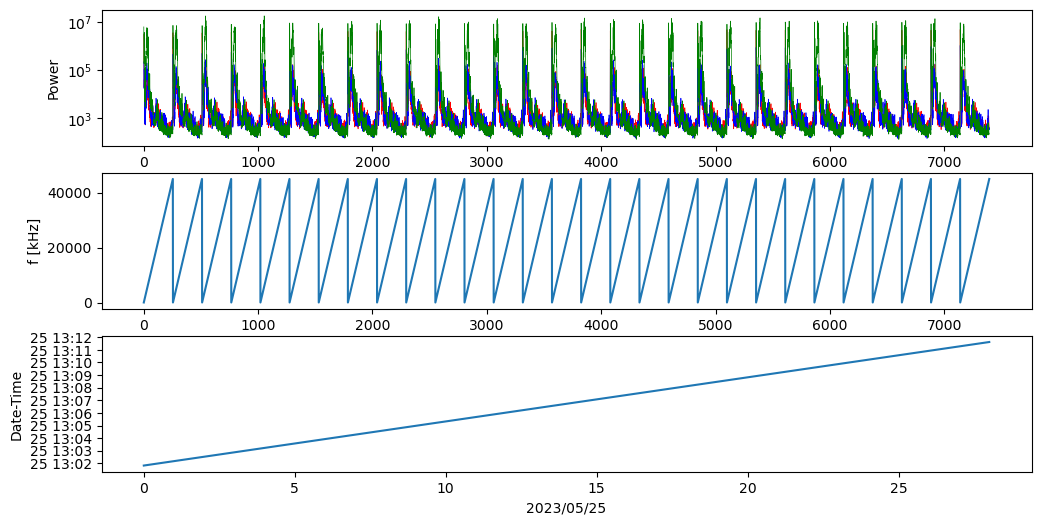

In [10]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

ax1.plot(np.ravel(data.EuEu), '-r', linewidth=.5)
ax1.plot(np.ravel(data.EvEv), '-b', linewidth=.5)
ax1.plot(np.ravel(data.EwEw), '-g', linewidth=.5)
ax1.set_yscale('log')
ax2.plot(np.ravel(data.frequency))
ax3.plot(np.ravel(data.epoch))

ax1.set_ylabel('Power')
ax2.set_ylabel('f [kHz]')
ax3.set_ylabel('Date-Time')
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
ax3.set_xlabel(date)

"""
# SPECIAL -- data check
# X-axis
xlim=[0, 491*32+1]
ax1.set_xlim(xlim)
ax2.set_xlim(xlim)
ax3.set_xlim(xlim)
#
# Y-axis
ylim=[-2000, +2000]
ax1.set_ylim(ylim)
# SPECIAL -- data check
"""

fig.show
png_fname = work_dir+data_name+'_2.png'
# fig.savefig(png_fname)

# Original

In [11]:
Epoch_1d = data.epoch.tolist()
freq_1d  = data.frequency[0].tolist()

EuEu_2d = data.EuEu.transpose()
EvEv_2d = data.EvEv.transpose()
EwEw_2d = data.EwEw.transpose()

## FT - LOG

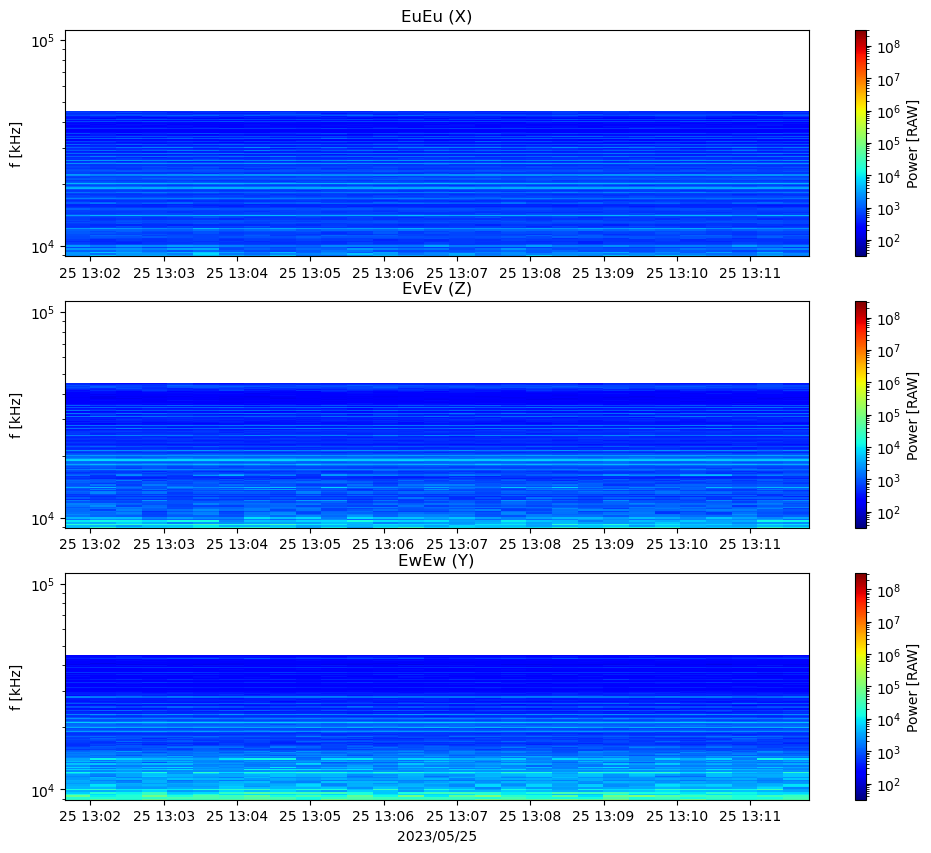

In [12]:
fig2d = plt.figure(figsize=[12,10])

ax1 = fig2d.add_subplot(3, 1, 1)
ax2 = fig2d.add_subplot(3, 1, 2)
ax3 = fig2d.add_subplot(3, 1, 3)

# Plot
p_min0 = p_min
p_max0 = p_max

# Y-axis
#ax1.set_ylim(f_min, f_max)
#ax2.set_ylim(f_min, f_max)
#ax3.set_ylim(f_min, f_max)
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax1.set_ylabel('f [kHz]')
ax2.set_ylabel('f [kHz]')
ax3.set_ylabel('f [kHz]')

# X-axis
ax1.set_title('EuEu (X)')
ax2.set_title('EvEv (Z)')
ax3.set_title('EwEw (Y)')
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
ax3.set_xlabel(date)

# Plot
p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EuEu_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
p2 = ax2.pcolormesh(Epoch_1d, freq_1d, EvEv_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
p3 = ax3.pcolormesh(Epoch_1d, freq_1d, EwEw_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')

if cal_mode == 0:
    str = 'Power [RAW]'
elif cal_mode == 1:
    str = 'Power [dBm@AD]'
elif cal_mode == 2:
    str = 'Power [V2@ADC]'
pp1 = fig2d.colorbar(p1, ax=ax1, orientation="vertical")
pp1.set_label(str)
pp2 = fig2d.colorbar(p2, ax=ax2, orientation="vertical")
pp2.set_label(str)
pp3 = fig2d.colorbar(p3, ax=ax3, orientation="vertical")
pp3.set_label(str)

plt.show()
png_fname = work_dir+data_name+'_FT-log.png'
# fig2d.savefig(png_fname)


## FT - linear

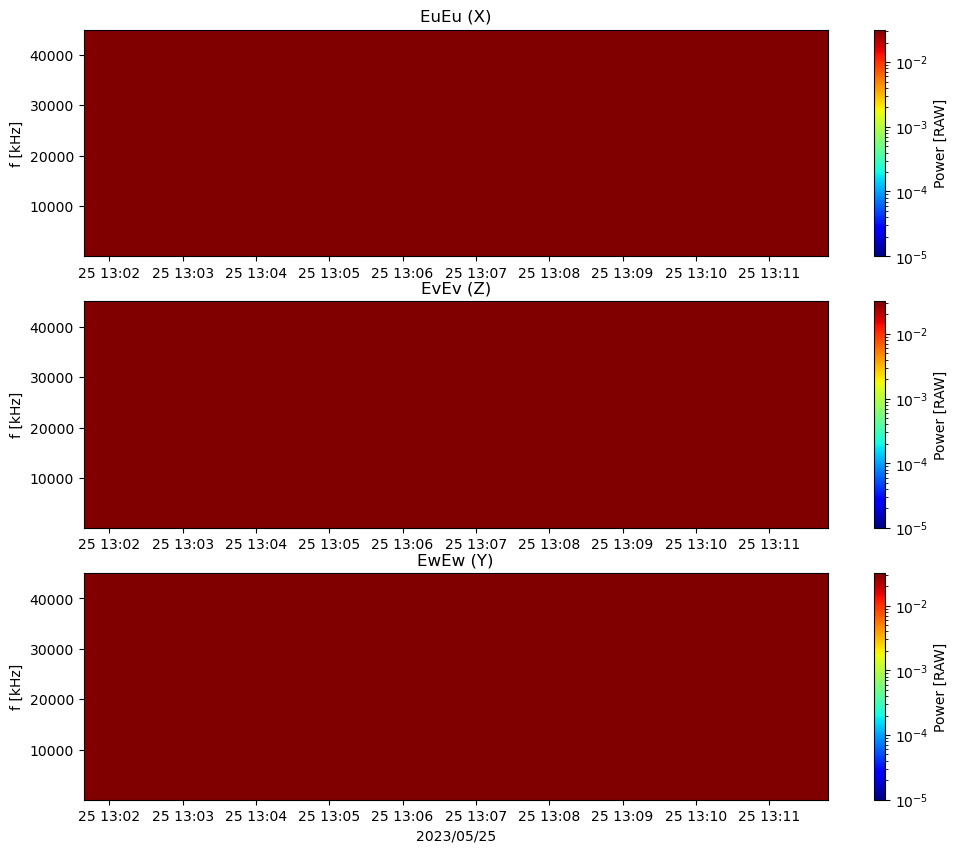

In [13]:
fig2d = plt.figure(figsize=[12,10])

ax1 = fig2d.add_subplot(3, 1, 1)
ax2 = fig2d.add_subplot(3, 1, 2)
ax3 = fig2d.add_subplot(3, 1, 3)

# Plot
p_min0 = p_min-6.5
p_max0 = p_max-10

# Y-axis
ax1.set_ylim(f_min, f_max)
ax2.set_ylim(f_min, f_max)
ax3.set_ylim(f_min, f_max)
ax1.set_ylabel('f [kHz]')
ax2.set_ylabel('f [kHz]')
ax3.set_ylabel('f [kHz]')

# X-axis
ax1.set_title('EuEu (X)')
ax2.set_title('EvEv (Z)')
ax3.set_title('EwEw (Y)')
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
ax3.set_xlabel(date)

# Plot
p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EuEu_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
p2 = ax2.pcolormesh(Epoch_1d, freq_1d, EvEv_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
p3 = ax3.pcolormesh(Epoch_1d, freq_1d, EwEw_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')

if cal_mode == 0:
    str = 'Power [RAW]'
elif cal_mode == 1:
    str = 'Power [dBm@AD]'
elif cal_mode == 2:
    str = 'Power [V2@ADC]'
pp1 = fig2d.colorbar(p1, ax=ax1, orientation="vertical")
pp1.set_label(str)
pp2 = fig2d.colorbar(p2, ax=ax2, orientation="vertical")
pp2.set_label(str)
pp3 = fig2d.colorbar(p3, ax=ax3, orientation="vertical")
pp3.set_label(str)

plt.show()
png_fname = work_dir+data_name+'_FT.png'
# fig2d.savefig(png_fname)

## Spec LOG

In [14]:
Eu_power1 = data.EuEu[0]
Ev_power1 = data.EvEv[0]
Ew_power1 = data.EwEw[0]
Eu_power2 = data.EuEu[n_time0]
Ev_power2 = data.EvEv[n_time0]
Ew_power2 = data.EwEw[n_time0]

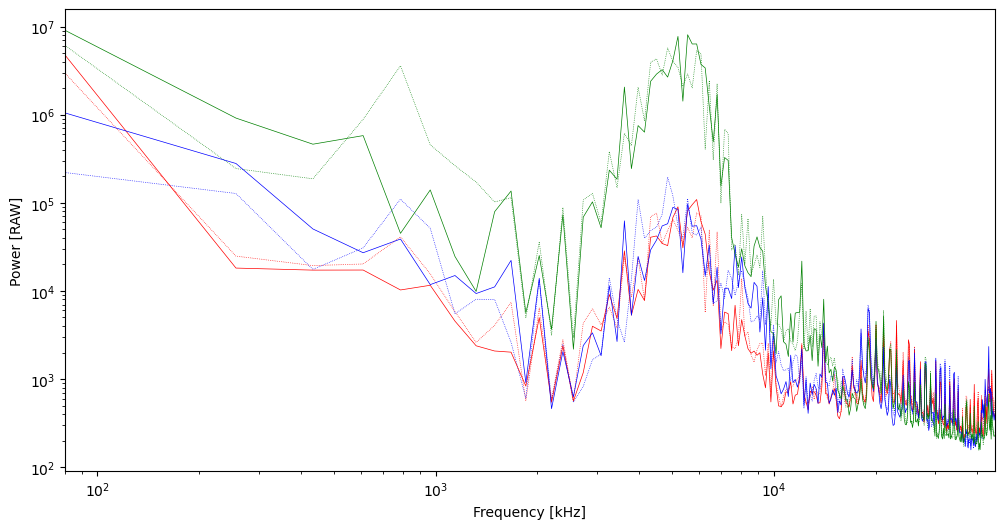

In [15]:
fig, cal = plt.subplots(figsize=(12, 6))

# Plot
p_min0 = p_min+1
p_max0 = p_max-3

cal.plot(freq_1d, Eu_power1, ':r', linewidth=.5)
cal.plot(freq_1d, Ev_power1, ':b', linewidth=.5)
cal.plot(freq_1d, Ew_power1, ':g', linewidth=.5)
cal.plot(freq_1d, Eu_power2, '-r', linewidth=.5)
cal.plot(freq_1d, Ev_power2, '-b', linewidth=.5)
cal.plot(freq_1d, Ew_power2, '-g', linewidth=.5)

cal.set_xlabel('Frequency [kHz]')
cal.set_xscale('log')
cal.set_xlim(f_min, f_max)

cal.set_yscale('log')
if cal_mode == 0:
    plt.ylabel('Power [RAW]')
elif cal_mode == 1:
    plt.ylabel('Power [dBm@AD]')
elif cal_mode == 2:
    plt.ylabel('Power [V^2@ADC]')
# cal.set_ylim(10**p_min0, 10**p_max0)

plt.show
png_fname = work_dir+data_name+'_spec-log.png'
# fig.savefig(png_fname)

## Spec-linear

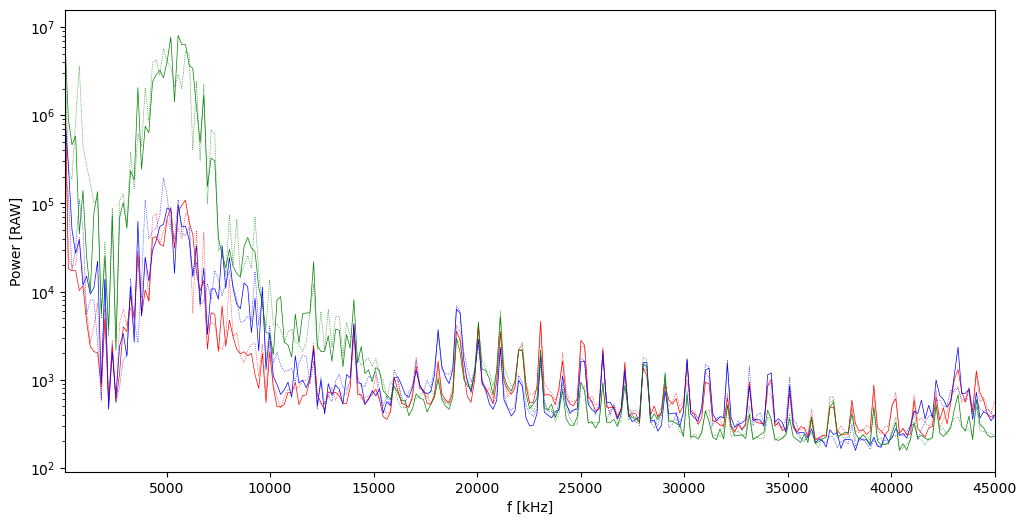

In [16]:
fig, cal = plt.subplots(figsize=(12, 6))

# Plot
p_min0 = p_min+1
p_max0 = p_max-3

cal.plot(freq_1d, Eu_power1, ':r', linewidth=.5)
cal.plot(freq_1d, Ev_power1, ':b', linewidth=.5)
cal.plot(freq_1d, Ew_power1, ':g', linewidth=.5)
cal.plot(freq_1d, Eu_power2, '-r', linewidth=.5)
cal.plot(freq_1d, Ev_power2, '-b', linewidth=.5)
cal.plot(freq_1d, Ew_power2, '-g', linewidth=.5)

cal.set_xlabel('f [kHz]')
cal.set_xlim(f_min, f_max)

cal.set_yscale('log')
if cal_mode == 0:
    plt.ylabel('Power [RAW]')
elif cal_mode == 1:
    plt.ylabel('Power [dBm@AD]')
elif cal_mode == 2:
    plt.ylabel('Power [V^2@ADC]')
# cal.set_ylim(10**p_min0, 10**p_max0)

plt.show
png_fname = work_dir+data_name+'_spec.png'
# fig.savefig(png_fname)

# CLEANED

In [17]:
EuEu_c = juice_math.clean_rfi(np.ravel(data.EuEu))
EvEv_c = juice_math.clean_rfi(np.ravel(data.EvEv))
EwEw_c = juice_math.clean_rfi(np.ravel(data.EwEw))
EuEu_c = EuEu_c.reshape(n_time, n_freq)
EvEv_c = EvEv_c.reshape(n_time, n_freq)
EwEw_c = EwEw_c.reshape(n_time, n_freq)

EuEu_c_2d = EuEu_c.transpose()
EvEv_c_2d = EvEv_c.transpose()
EwEw_c_2d = EwEw_c.transpose()
Eu_c_power1 = EuEu_c[0]
Ev_c_power1 = EvEv_c[0]
Ew_c_power1 = EvEv_c[0]
Eu_c_power2 = EuEu_c[n_time0]
Ev_c_power2 = EvEv_c[n_time0]
Ew_c_power2 = EwEw_c[n_time0]

## CLEANED -- FT LOG

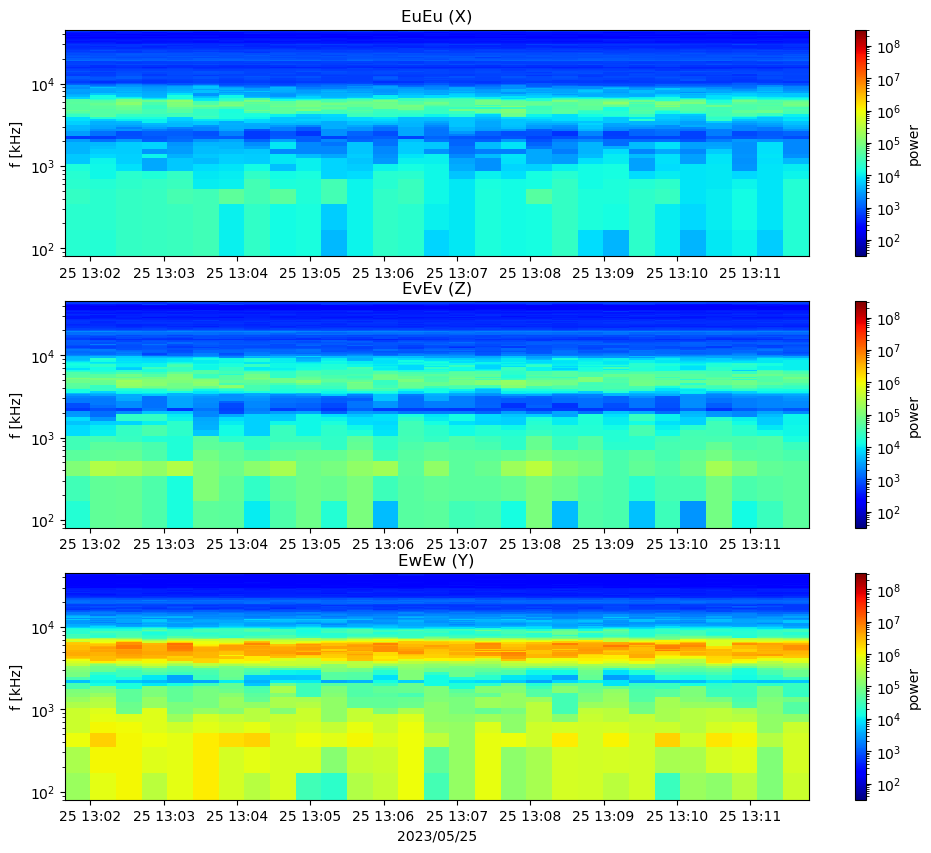

In [18]:
fig2d = plt.figure(figsize=[12,10])

ax1 = fig2d.add_subplot(3, 1, 1)
ax2 = fig2d.add_subplot(3, 1, 2)
ax3 = fig2d.add_subplot(3, 1, 3)

# Y-axis
ax1.set_ylim(f_min, f_max)
ax2.set_ylim(f_min, f_max)
ax3.set_ylim(f_min, f_max)
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax1.set_ylabel('f [kHz]')
ax2.set_ylabel('f [kHz]')
ax3.set_ylabel('f [kHz]')

# X-axis
ax1.set_title('EuEu (X)')
ax2.set_title('EvEv (Z)')
ax3.set_title('EwEw (Y)')
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
ax3.set_xlabel(date)

# Plot
p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EuEu_c_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p2 = ax2.pcolormesh(Epoch_1d, freq_1d, EvEv_c_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p3 = ax3.pcolormesh(Epoch_1d, freq_1d, EwEw_c_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')

if cal_mode == 0:
    str = 'Power [RAW]'
elif cal_mode == 1:
    str = 'Power [dBm@AD]'
elif cal_mode == 2:
    str = 'Power [V2@ADC]'
pp1 = fig2d.colorbar(p1, ax=ax1, orientation="vertical")
pp1.set_label('power')
pp2 = fig2d.colorbar(p2, ax=ax2, orientation="vertical")
pp2.set_label('power')
pp3 = fig2d.colorbar(p3, ax=ax3, orientation="vertical")
pp3.set_label('power')

plt.show()
png_fname = work_dir+data_name+'_FT-log-clean.png'
# fig2d.savefig(png_fname)

## CLEANED -- FT

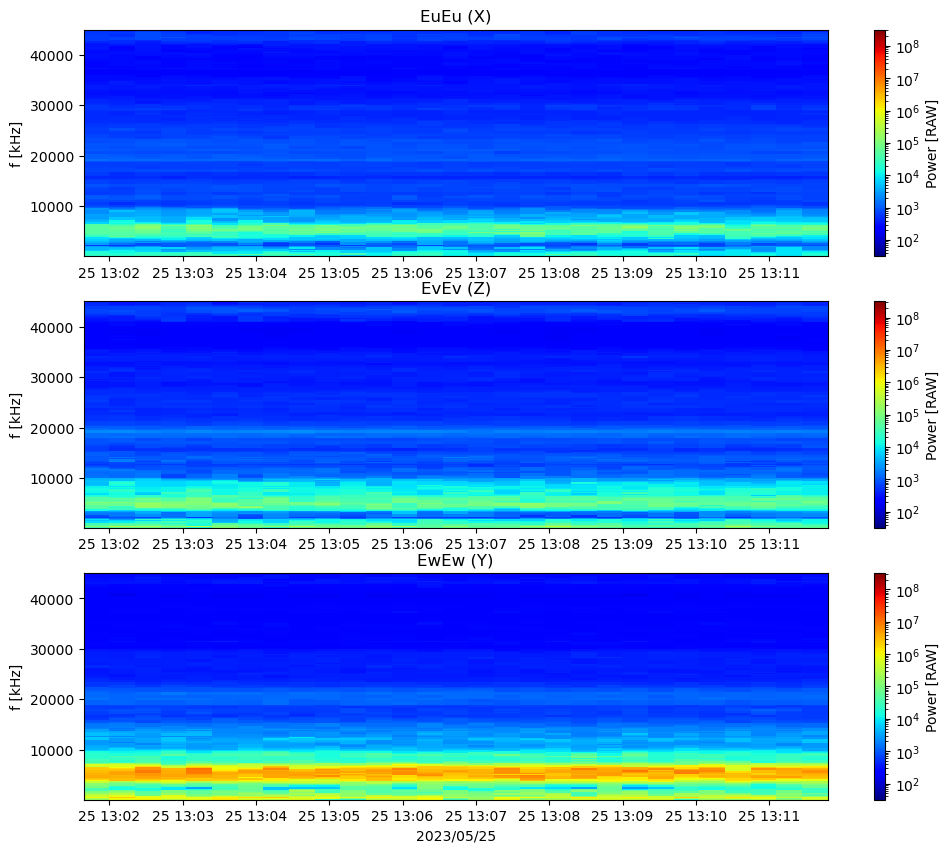

In [19]:
fig2d = plt.figure(figsize=[12,10])

ax1 = fig2d.add_subplot(3, 1, 1)
ax2 = fig2d.add_subplot(3, 1, 2)
ax3 = fig2d.add_subplot(3, 1, 3)

# Y-axis
ax1.set_ylim(f_min, f_max)
ax2.set_ylim(f_min, f_max)
ax3.set_ylim(f_min, f_max)
ax1.set_ylabel('f [kHz]')
ax2.set_ylabel('f [kHz]')
ax3.set_ylabel('f [kHz]')

# X-axis
ax1.set_title('EuEu (X)')
ax2.set_title('EvEv (Z)')
ax3.set_title('EwEw (Y)')
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
ax3.set_xlabel(date)

# Plot
p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EuEu_c_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p2 = ax2.pcolormesh(Epoch_1d, freq_1d, EvEv_c_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p3 = ax3.pcolormesh(Epoch_1d, freq_1d, EwEw_c_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')

if cal_mode == 0:
    str = 'Power [RAW]'
elif cal_mode == 1:
    str = 'Power [dBm@AD]'
elif cal_mode == 2:
    str = 'Power [V^2@ADC]'
pp1 = fig.colorbar(p1, ax=ax1, orientation="vertical")
pp1.set_label(str)
pp2 = fig.colorbar(p2, ax=ax2, orientation="vertical")
pp2.set_label(str)
pp3 = fig.colorbar(p3, ax=ax3, orientation="vertical")
pp3.set_label(str)

plt.show()

png_fname = work_dir+data_name+'_FT-clean.png'
# fig2d.savefig(png_fname)

## CLEANED - Spec LOG

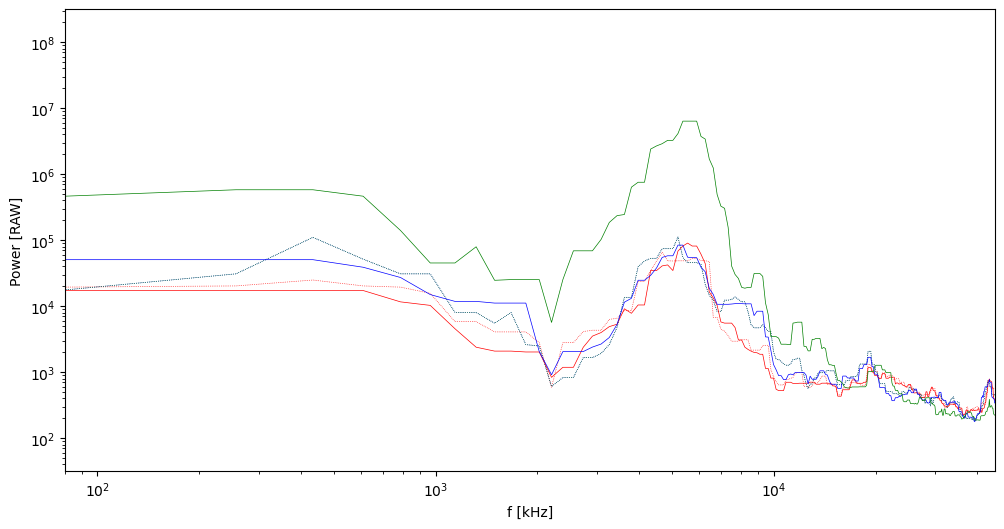

In [20]:
fig, cal = plt.subplots(figsize=(12, 6))

cal.plot(freq_1d, Eu_c_power1, ':r', linewidth=.5)
cal.plot(freq_1d, Ev_c_power1, ':b', linewidth=.5)
cal.plot(freq_1d, Ew_c_power1, ':g', linewidth=.5)
cal.plot(freq_1d, Eu_c_power2, '-r', linewidth=.5)
cal.plot(freq_1d, Ev_c_power2, '-b', linewidth=.5)
cal.plot(freq_1d, Ew_c_power2, '-g', linewidth=.5)

cal.set_xscale('log')
cal.set_xlabel('f [kHz]')
cal.set_xlim(f_min, f_max)

cal.set_yscale('log')
if cal_mode == 0:
    plt.ylabel('Power [RAW]')
elif cal_mode == 1:
    plt.ylabel('Power [dBm@AD]')
elif cal_mode == 2:
    plt.ylabel('Power [V^2@ADC]')
cal.set_ylim(10**p_min, 10**p_max)

plt.show
png_fname = work_dir+data_name+'_spec-log-clean.png'
# fig.savefig(png_fname)

## CLEANED Spec Linear

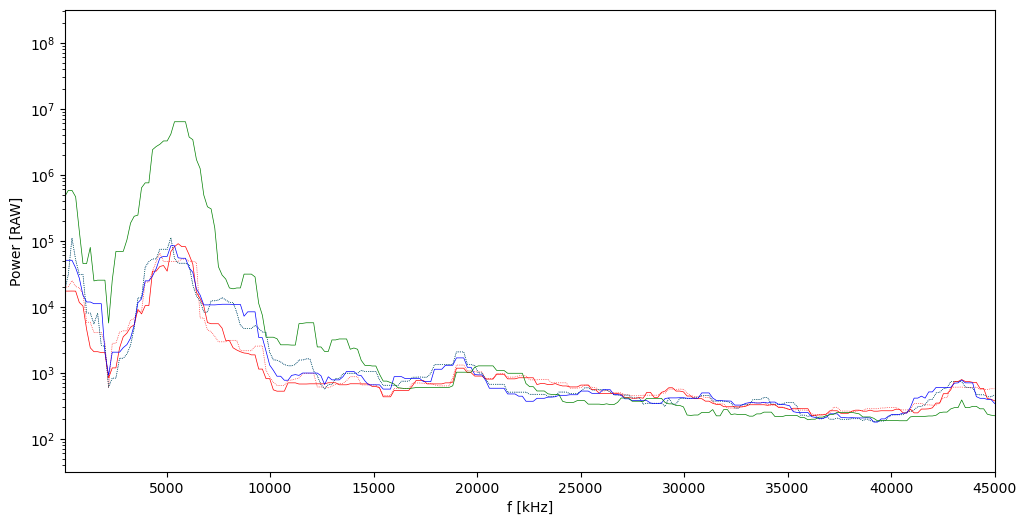

In [21]:
fig, cal = plt.subplots(figsize=(12, 6))

cal.plot(freq_1d, Eu_c_power1, ':r', linewidth=.5)
cal.plot(freq_1d, Ev_c_power1, ':b', linewidth=.5)
cal.plot(freq_1d, Ew_c_power1, ':g', linewidth=.5)
cal.plot(freq_1d, Eu_c_power2, '-r', linewidth=.5)
cal.plot(freq_1d, Ev_c_power2, '-b', linewidth=.5)
cal.plot(freq_1d, Ew_c_power2, '-g', linewidth=.5)

cal.set_xlabel('f [kHz]')
cal.set_xlim(f_min, f_max)

cal.set_yscale('log')
if cal_mode == 0:
    plt.ylabel('Power [RAW]')
elif cal_mode == 1:
    plt.ylabel('Power [dBm@AD]')
elif cal_mode == 2:
    plt.ylabel('Power [V^2@ADC]')
cal.set_ylim(10**p_min, 10**p_max)

plt.show
png_fname = work_dir+data_name+'_spec-clean.png'
# fig.savefig(png_fname)